# Group 1 Notebook - data set Career Breaks and their Impact for Women in Scotland

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Career_Breaks_AK_1.2.3.csv")

In [89]:
# show data set info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Scotland                        473 non-null    object
 1   Woman                           471 non-null    object
 2   OnBreakOrWorking                470 non-null    object
 3   CurrentBreakLength              186 non-null    object
 4   CurrentBreakReason              186 non-null    object
 5   CurrentBreakObstacles           186 non-null    object
 6   CurrentBreakWhenReturn          186 non-null    object
 7   WorkingArrangements             284 non-null    object
 8   WorkingChanges                  284 non-null    object
 9   WorkingBreakLength              284 non-null    object
 10  WorkingBreakReason              284 non-null    object
 11  WorkingBreakObstacles           284 non-null    object
 12  MultipleCareerBreaksNumber      470 non-null    ob

## Data set - first insight and explanation

There are 473 rows in the data set.
3 entries are from either outside Scotland or not a women. -> column 0 and 1, survey ended for those 3 

The remaining 470 entries split into **186 women on a break** and **284 women working after a break** (column 2). 

The data set has 29 columns in total: 
* column 3 - 6: women on a break (186)
* column 7 -11: women working after a career break (284)
* *column 12 - 15: questions reg multiple career breaks - no further investigation for this project*
* *column 16 + 17: what does 'work' mean to you, and what did you do while on break - no further investigation*
* column 18 - 20: what support would be/have been helpful to return to work
* column 21 - 29: characteristics and demographic info

All data is string based, so of the type 'object'.


In [90]:
#Check uniqiue values 
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    

Scotland: Number of unique values 2
Woman: Number of unique values 2
OnBreakOrWorking: Number of unique values 2
CurrentBreakLength: Number of unique values 3
CurrentBreakReason: Number of unique values 88
CurrentBreakObstacles: Number of unique values 166
CurrentBreakWhenReturn: Number of unique values 25
WorkingArrangements: Number of unique values 18
WorkingChanges: Number of unique values 215
WorkingBreakLength: Number of unique values 3
WorkingBreakReason: Number of unique values 93
WorkingBreakObstacles: Number of unique values 225
MultipleCareerBreaksNumber: Number of unique values 3
MultipleCareerBreaksTotaLenth: Number of unique values 4
MultipleCareerBreaksReasons: Number of unique values 3
MultipleCareerBreaksDiffImpact: Number of unique values 6
AllWorkMeaning: Number of unique values 387
AllBreakActivity: Number of unique values 125
SupportAffordableChildcare: Number of unique values 4
SupportFlexWorkEmployers: Number of unique values 4
SupportThroughEmployer: Number of un

In [91]:
#identify columns with under 15 unique values, and list these with their values & count to provide insight 
object_col=[]
for column in df.columns:
    if df[column].nunique() <= 15:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")
        

Scotland : ['Yes' 'No']
Scotland
Yes    471
No       2
Name: count, dtype: int64
Woman : ['Yes' nan 'No']
Woman
Yes    470
No       1
Name: count, dtype: int64
OnBreakOrWorking : ['working' 'onbreak' nan]
OnBreakOrWorking
working    284
onbreak    186
Name: count, dtype: int64
CurrentBreakLength : [nan 'more than 5 years' '6 months to 2 years' '2 to 5 years']
CurrentBreakLength
6 months to 2 years    83
2 to 5 years           53
more than 5 years      50
Name: count, dtype: int64
WorkingBreakLength : ['more than 5 years' '6 months to 2 years' nan '2 to 5 years']
WorkingBreakLength
6 months to 2 years    197
more than 5 years       45
2 to 5 years            42
Name: count, dtype: int64
MultipleCareerBreaksNumber : ['No, only one break of 6 months or more'
 'Yes, three or more separate breaks of at least 6 months each'
 'Yes, two separate breaks of at least 6 months each' nan]
MultipleCareerBreaksNumber
No, only one break of 6 months or more                          265
Yes, two separat

# Unique Values - what does it show, and how to proceed:
<br>1. The first two questions, *Scotland* and *Woman*, were asked to ensure only women in Scotland fill the survey. Two answered No for Scotland which ended the survey, and one answered No to the question whether they were a woman, again, the survey ended there for them. <br> Only the 470 entries from Women in Scotland will be analysed going forward.  

<br>2. Most questions were single choice based, therefor only have a limited number of values between 2 and 7.<br>The following will be used for analysis:

   * **CurrentBreakLength** and **WorkingBreakLength** - to compare
   * **SupportAffordableChildcare, SupportFlexWorkEmployers, SupportThroughEmployer** - to show support needs
   * **AllChildrenInHousehold, AllChildrenWithASN** - analysing their impact on women and their careers
   * and **AllAge, AllEducation** - to describe the population
   * (*AllYearsWorkexperience* - not used for this project, no additional insight)

<br>3. Other questions offered multiple answers and therefore have multiple values per cell. 
   * **CurrentBreakReason** and **WorkingBreakReason** -> will be split & counted by reasons and analysed.
   * **CurrentBreakObstacles**, **WorkingBreakObstacles** -> will be split & counted by reasons and analysed.
   * **AllCharacteristics** ->  will be split & counted by characteristics and analysed.
   * **WorkingChanges** -> will be analysed 
   * *AllBreakActivity* offered multiple answers too but won't be analysed for this project. The information available is in parts redundant to the *reasons* for the break, and partly also available within *characteristics*, which will both be looked into within this project.
   * *AllWorkMeaning* will not be analysed for this project.     

<br>4. The following questions offered only single choice including the field "other", with the option to fill in text, leading to additional unique values. 

   * **CurrentBreakWhenReturn** - will be analysed for recommendations
   * *WorkingArrangements* - will not be used for this project. 



## **Data Analysis & Visualisation**

### **Reasons for Break - currently on break**

In [92]:
#split and count values for column CurrentBreakReason
CurrentBreakReason_split = df['CurrentBreakReason'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
CurrentBreakReason_counts = CurrentBreakReason_split.value_counts().reset_index()
CurrentBreakReason_counts.columns = ['Value', 'Count']

#print(CurrentBreakReason_counts)                                                                    

In [93]:
#create code where all those with unique value are counted and summed up into "Other"
#then print new df consisting of values and counts with a row/additional value "Other" 
#new data frame: CurrentBreakReason_clean

# Filter rows where count is greater than 1 into new DataFrame
CurrentBreakReason_count1 = CurrentBreakReason_counts[CurrentBreakReason_counts['Count'] > 1] 

# Sum the counts of rows where count = 1 and create a new row 'Other' 
other_count = CurrentBreakReason_counts[CurrentBreakReason_counts['Count'] == 1]['Count'].sum() 
other_row = pd.DataFrame([{'Value': 'Other', 'Count': other_count}]) 

# Append the 'Other' row to the filtered DataFrame 
CurrentBreakReason_clean = pd.concat([CurrentBreakReason_count1, other_row], ignore_index=True) 

#print(CurrentBreakReason_clean)

In [94]:
# turn above table into one with percentages instead of counts

# use the total count in row 0 to create percentage
total_count = CurrentBreakReason_clean['Count'].iloc[0]
percentage = CurrentBreakReason_clean['Count']/total_count*100

# add new column to df 
CurrentBreakReason_clean['Percentage'] = percentage

print(CurrentBreakReason_clean)
CurrentBreakReason_clean.to_csv("CurrentBreakReason_clean.csv")

                                 Value  Count  Percentage
0                                         186  100.000000
1                            Childcare     97   52.150538
2                      Maternity leave     62   33.333333
3   Health reasons/disability/recovery     52   27.956989
4        Other Caring Responsibilities     42   22.580645
5                             Burn-out     35   18.817204
6                           Relocation     18    9.677419
7                           Redundancy     16    8.602151
8                   Workplace bullying     15    8.064516
9          Supporting partner's career     15    8.064516
10                           Menopause     11    5.913978
11                          Travelling      4    2.150538
12                               Study      2    1.075269
13                               Other     19   10.215054


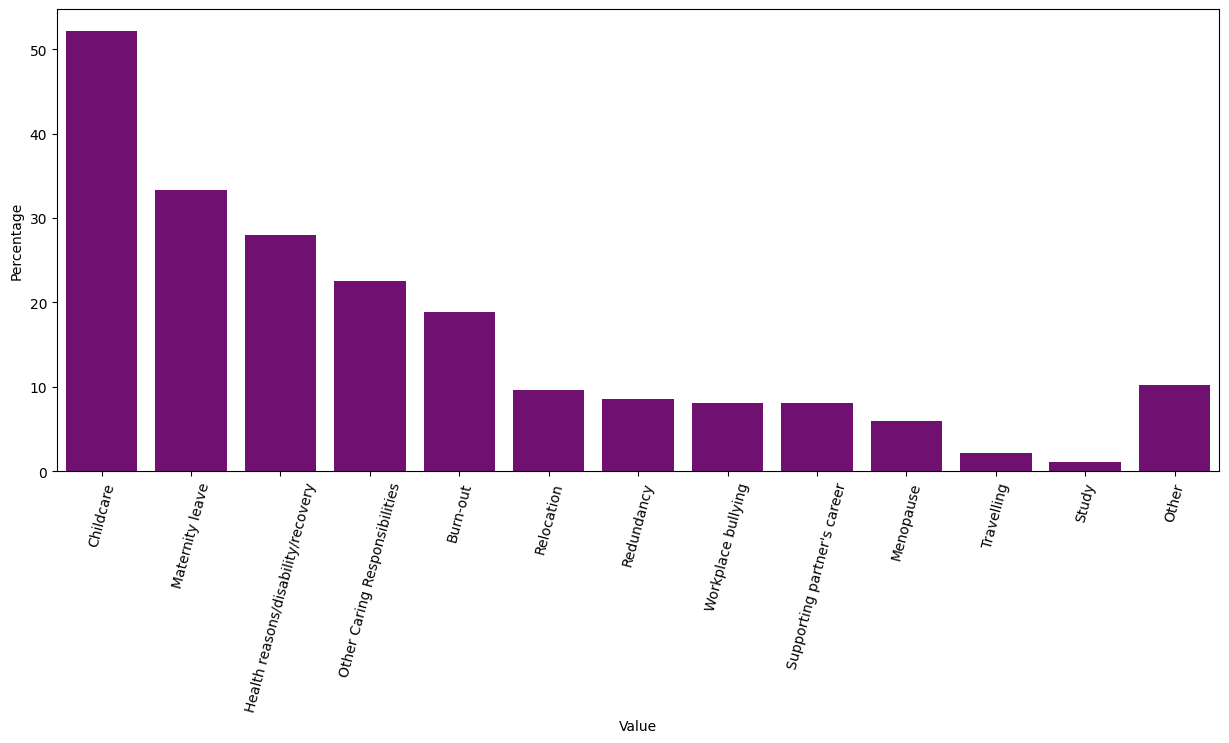

In [95]:
# creat a bar graph showing the percentages for data frame CurrentBreakReason_clean 

plt.figure(figsize=(15,6))
sns.barplot(data=CurrentBreakReason_clean[1:14], x='Value', y='Percentage', color='purple')
plt.xticks(rotation=75)
plt.show() 


In [96]:
#Bar labels using {}-style format string - according to matplotlib 

#fruit_names = ['Coffee', 'Salted Caramel', 'Pistachio']
#fruit_counts = [4000, 2000, 7000]

#fig, ax = plt.subplots()
#bar_container = ax.bar(fruit_names, fruit_counts)
#ax.set(ylabel='pints sold', title='Gelato sales by flavor', ylim=(0, 8000))
#ax.bar_label(bar_container, fmt='{:,.0f}')


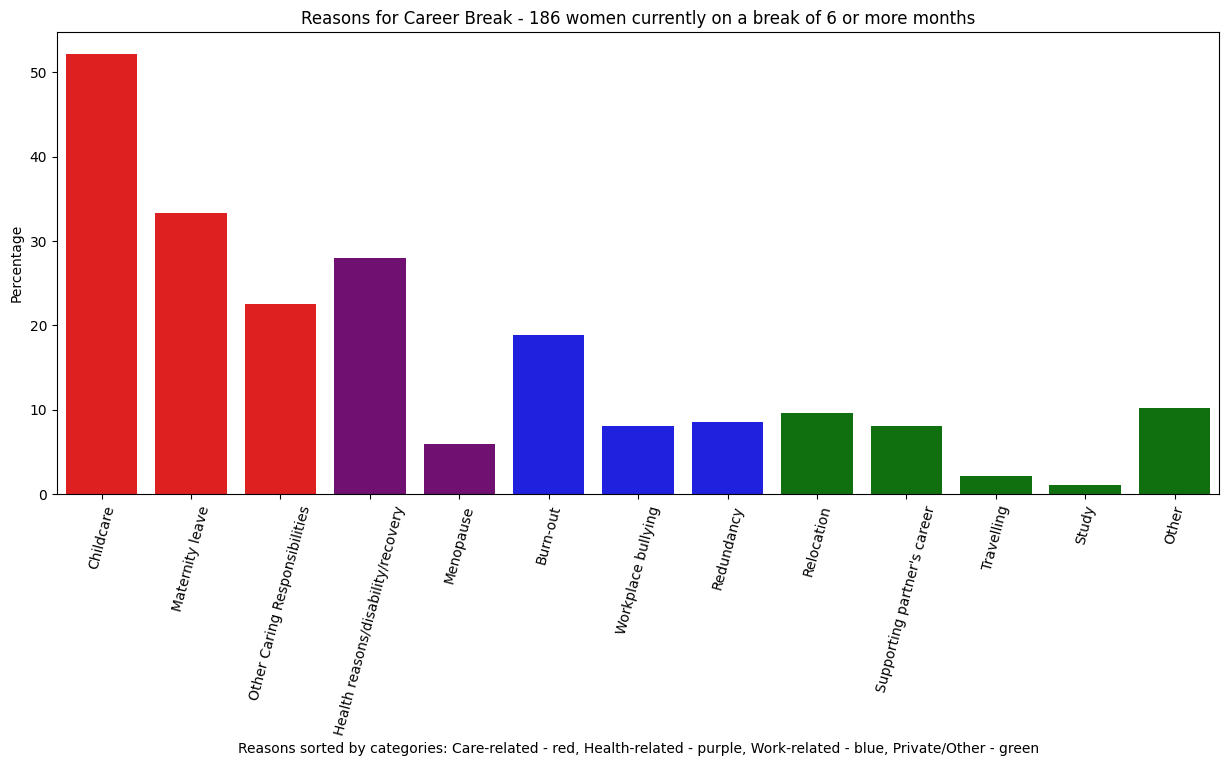

In [97]:
# order the values into categories 
#   Caring Responsibility - red: Maternity Leave, Childcare, Other Caring Responsibilities. 
#   Health Issues - purple: Health reasons/disability/recovery, Menopause, 
#   Work related - blue: Burn-out, Workplace bullying, Redundancy (first two are also health issues)
#   private or other - green: Relocation, Supporting partner's career, Travelling, Study, Other

plt.figure(figsize=(15,6))
sns.barplot(data=CurrentBreakReason_clean.loc[[1, 2, 4]], x='Value', y='Percentage', color='red')
sns.barplot(data=CurrentBreakReason_clean.loc[[3, 10]], x='Value', y='Percentage', color='purple')
sns.barplot(data=CurrentBreakReason_clean.loc[[5, 8, 7]], x='Value', y='Percentage', color='blue')
sns.barplot(data=CurrentBreakReason_clean.loc[[6, 9, 11, 12, 13]], x='Value', y='Percentage', color='green')
plt.xticks(rotation=75)
plt.title('Reasons for Career Break - 186 women currently on a break of 6 or more months')
plt.xlabel('Reasons sorted by categories: Care-related - red, Health-related - purple, Work-related - blue, Private/Other - green')
plt.show() 


### **Obstacles to return to work - those currently on a career break**

                                        Value  Count  Percentage
0                                                186  100.000000
1                       Lack of flexible jobs     96   51.612903
2                          Lack in confidence     61   32.795699
3            Lack of support (family/network)     58   31.182796
4                  Not knowing where to start     57   30.645161
5                   Unsuccessful applications     51   27.419355
6                 Career switch (unsure what)     51   27.419355
7                      Lack of care provision     50   26.881720
8     Lack of confidence in skills/experience     47   25.268817
9                 Discrimination (career gap)     46   24.731183
10                  Lack of jobs (local area)     41   22.043011
11                    Lack of affordable care     40   21.505376
12                           Timing not right     36   19.354839
13             Health issue (lack of support)     34   18.279570
14            Lack of job

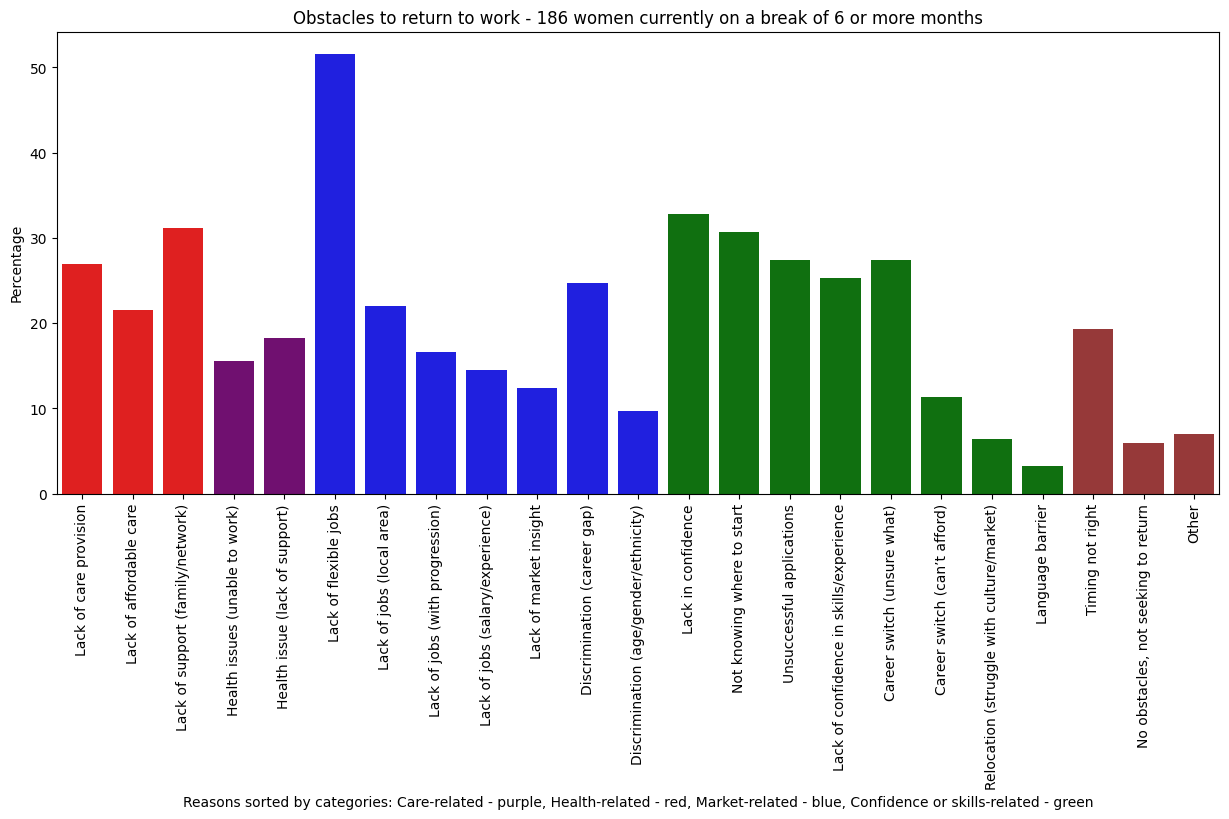

In [98]:
# CurrentBreakObstacles

#split and count values for column CurrentBreakObstacles
CurrentBreakObstacles_split = df['CurrentBreakObstacles'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
CurrentBreakObstacles_counts = CurrentBreakObstacles_split.value_counts().reset_index()
CurrentBreakObstacles_counts.columns = ['Value', 'Count']
#print(CurrentBreakObstacles_counts)

# Filter rows where count is greater than 1 into new DataFrame
CurrentBreakObstacles_count1 = CurrentBreakObstacles_counts[CurrentBreakObstacles_counts['Count'] > 1] 

# Sum the counts of rows where count = 1 and create a new row 'Other' 
other_countObst = CurrentBreakObstacles_counts[CurrentBreakObstacles_counts['Count'] == 1]['Count'].sum() 
other_rowObst = pd.DataFrame([{'Value': 'Other', 'Count': other_countObst}]) 

# Append the 'Other' row to the filtered DataFrame 
CurrentBreakObstacles_clean = pd.concat([CurrentBreakObstacles_count1, other_rowObst], ignore_index=True) 

#print(CurrentBreakObstacles_clean)

# use the total count in row 0 to create percentage
total_count5 = CurrentBreakObstacles_clean['Count'].iloc[0]
percentage5 = CurrentBreakObstacles_clean['Count']/total_count5*100

# add new column to df 
CurrentBreakObstacles_clean['Percentage'] = percentage5

print(CurrentBreakObstacles_clean)

#write to new csv file
CurrentBreakObstacles_clean.to_csv("CurrentBreakObstacles_clean.csv")

#plt.figure(figsize=(15,6))
#sns.barplot(data=CurrentBreakObstacles_clean[1:14], x='Value', y='Percentage', color='purple')
#plt.xticks(rotation=75)
#plt.show() 

plt.figure(figsize=(15,6))
sns.barplot(data=CurrentBreakObstacles_clean.loc[[7, 11, 3]], x='Value', y='Percentage', color='red')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[15, 13]], x='Value', y='Percentage', color='purple')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[1, 10, 14, 16, 17, 9, 19]], x='Value', y='Percentage', color='blue')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[2, 4, 5, 8, 6, 18, 20, 22]], x='Value', y='Percentage', color='green')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[12, 21, 23]], x='Value', y='Percentage', color='brown')
plt.xticks(rotation=90)
plt.title('Obstacles to return to work - 186 women currently on a break of 6 or more months')
plt.xlabel('Reasons sorted by categories: Care-related - purple, Health-related - red, Market-related - blue, Confidence or skills-related - green')
plt.show() 


### **Timeframe - When ready to Return to work - those currently on break**

In [99]:
#split and count values for column CurrentBreakWhenReturn
CurrentBreakWhenReturn_split = df['CurrentBreakWhenReturn'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
CurrentBreakWhenReturn_counts = CurrentBreakWhenReturn_split.value_counts().reset_index()
CurrentBreakWhenReturn_counts.columns = ['Value', 'Count']
#print(CurrentBreakWhenReturn_counts)

# add all those with unique values into one new line called Others
CurrentBreakWhenReturn_count1 = CurrentBreakWhenReturn_counts[CurrentBreakWhenReturn_counts['Count'] > 1] 

otherRet_count = CurrentBreakWhenReturn_counts[CurrentBreakWhenReturn_counts['Count'] == 1]['Count'].sum() 
otherRet_row = pd.DataFrame([{'Value': 'Other', 'Count': otherRet_count}]) 

CurrentBreakWhenReturn_clean = pd.concat([CurrentBreakWhenReturn_count1, otherRet_row], ignore_index=True) 

#print(CurrentBreakWhenReturn_clean)


Return to Work - ordered by time
                          Value  Count  Percentage
1                   Immediately     53   28.494624
0  Within the next three months     53   28.494624
3             Within six months     29   15.591398
2               In about a year     30   16.129032
4                         Other     21   11.290323


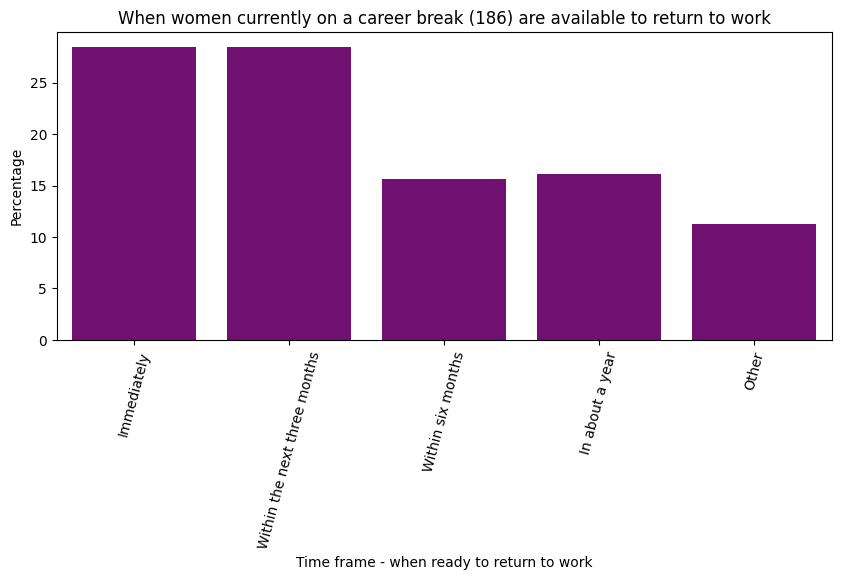

In [100]:
# calculate percentages out of the count
total_count_return = CurrentBreakWhenReturn_clean['Count'].sum()
percentage_return = CurrentBreakWhenReturn_clean['Count']/total_count_return*100

CurrentBreakWhenReturn_clean['Percentage'] = percentage_return
#print(CurrentBreakWhenReturn_clean)

#print with re-ordered rows from sooner to later 
print('Return to Work - ordered by time')
print(CurrentBreakWhenReturn_clean.loc[[1, 0, 3, 2, 4]])

#write table to new csv file
CurrentBreakWhenReturn_clean.to_csv("CurrentBreakWhenReturn_clean.csv")

#plot bar graph in order from sooner to later
plt.figure(figsize=(10,4))
sns.barplot(data=CurrentBreakWhenReturn_clean.loc[[1, 0, 3, 2, 4]], x='Value', y='Percentage', color='purple')
plt.xticks(rotation=75)
plt.title('When women currently on a career break (186) are available to return to work')
plt.xlabel('Time frame - when ready to return to work')
plt.show() 


### **Reasons for Break - women working after previous career break**

In [101]:
#split and count values for column WorkingBreakReason
WorkingBreakReason_split = df['WorkingBreakReason'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
WorkingBreakReason_counts = WorkingBreakReason_split.value_counts().reset_index()
WorkingBreakReason_counts.columns = ['Value', 'Count']
#print(WorkingBreakReason_counts)


In [102]:
#create code where all those with unique values are counted and summed up into "Other"

WorkingBreakReason_count1 = WorkingBreakReason_counts[WorkingBreakReason_counts['Count'] > 1] 

otherWRea_count = WorkingBreakReason_counts[WorkingBreakReason_counts['Count'] == 1]['Count'].sum() 
otherWRea_row = pd.DataFrame([{'Value': 'Other', 'Count': otherWRea_count}]) 

WorkingBreakReason_clean = pd.concat([WorkingBreakReason_count1, otherWRea_row], ignore_index=True) 

#print(WorkingBreakReason_clean)

                                 Value  Count  Percentage
0                                         284  100.000000
1                      Maternity Leave    144   50.704225
2                            Childcare    103   36.267606
3                           Relocation     33   11.619718
4                             Burn-out     31   10.915493
5   Health reasons/disability/recovery     30   10.563380
6        Other Caring Responsibilities     28    9.859155
7                           Redundancy     21    7.394366
8          Supporting partner's career     18    6.338028
9                   Workplace bullying     17    5.985915
10                          Travelling     10    3.521127
11                               Covid      2    0.704225
12                           Menopause      2    0.704225
13                               Other     26    9.154930


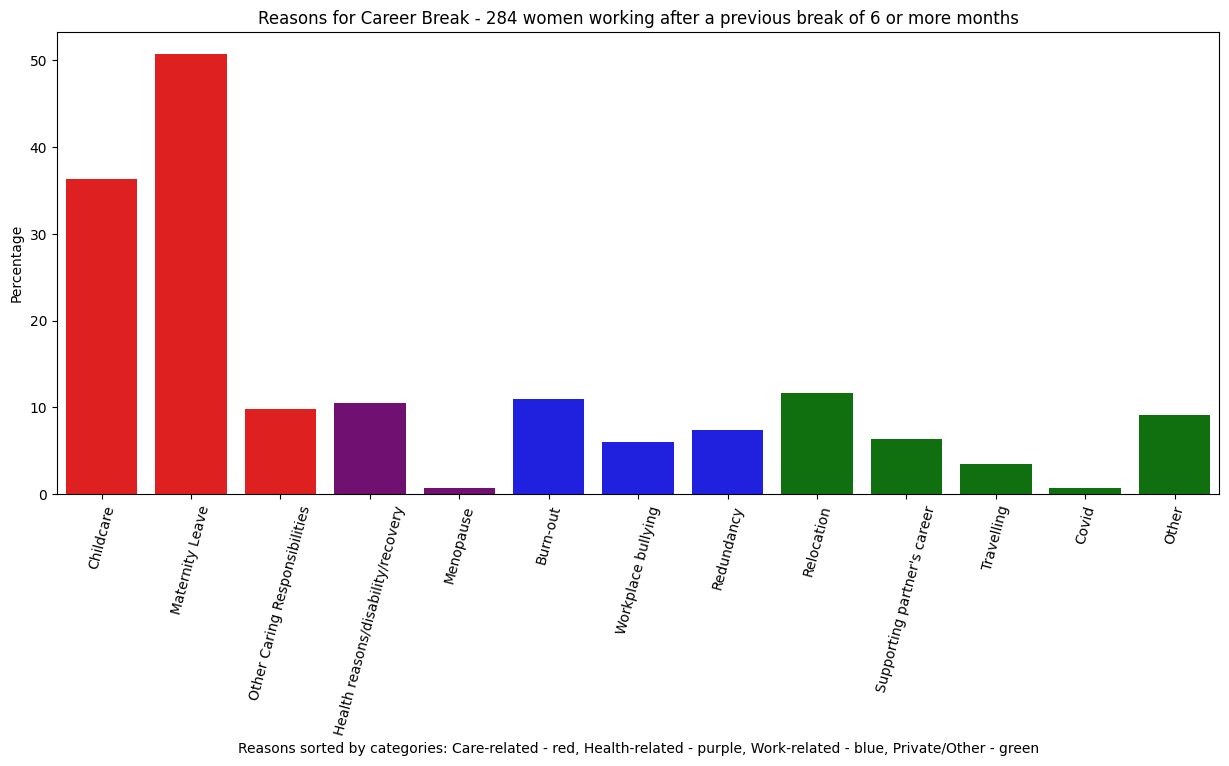

In [103]:
# create new data frame with percentages instead of count
total_countW = WorkingBreakReason_clean['Count'].iloc[0]

percentageW = WorkingBreakReason_clean['Count']/total_countW*100

WorkingBreakReason_clean['Percentage'] = percentageW

print(WorkingBreakReason_clean)

#write table to new csv file
WorkingBreakReason_clean.to_csv("WorkingBreakReason_clean.csv")

# create bar graph grouped by caring responsibility, health issues, work issues, private
#   Caring Responsibility - red: Maternity Leave, Childcare, Other Caring Responsibilities. 
#   Health Issues - purple: Health reasons/disability/recovery, Menopause, 
#   Work related - blue: Burn-out, Workplace bullying, Redundancy (first two are also health issues)
#   private or other - green: Relocation, Supporting partner's career, Travelling, Covid, Other

plt.figure(figsize=(15,6))
sns.barplot(data=WorkingBreakReason_clean.loc[[2, 1, 6]], x='Value', y='Percentage', color='red')
sns.barplot(data=WorkingBreakReason_clean.loc[[5, 12]], x='Value', y='Percentage', color='purple')
sns.barplot(data=WorkingBreakReason_clean.loc[[4, 9, 7]], x='Value', y='Percentage', color='blue')
sns.barplot(data=WorkingBreakReason_clean.loc[[3, 8, 10, 11, 13]], x='Value', y='Percentage', color='green')
plt.xticks(rotation=75)
plt.title('Reasons for Career Break - 284 women working after a previous break of 6 or more months')
plt.xlabel('Reasons sorted by categories: Care-related - red, Health-related - purple, Work-related - blue, Private/Other - green')
plt.show() 


### **Obstacles to return to work - women working after previous career break**

                                                Value  Count  Percentage
0                                                        284  100.000000
1                               Lack of flexible jobs    132   46.478873
2                    Lack of support (family/network)     96   33.802817
3                             Lack of affordable care     77   27.112676
4                     Lack of jobs (with progression)     76   26.760563
5                              Lack of care provision     67   23.591549
6                           Unsuccessful applications     64   22.535211
7                           Lack of jobs (local area)     63   22.183099
8                    Lack of jobs (salary/experience)     59   20.774648
9                                  Lack in confidence     55   19.366197
10                        Career switch (unsure what)     48   16.901408
11                         Not knowing where to start     45   15.845070
12  No obstacles, it was planned and/or worked out.

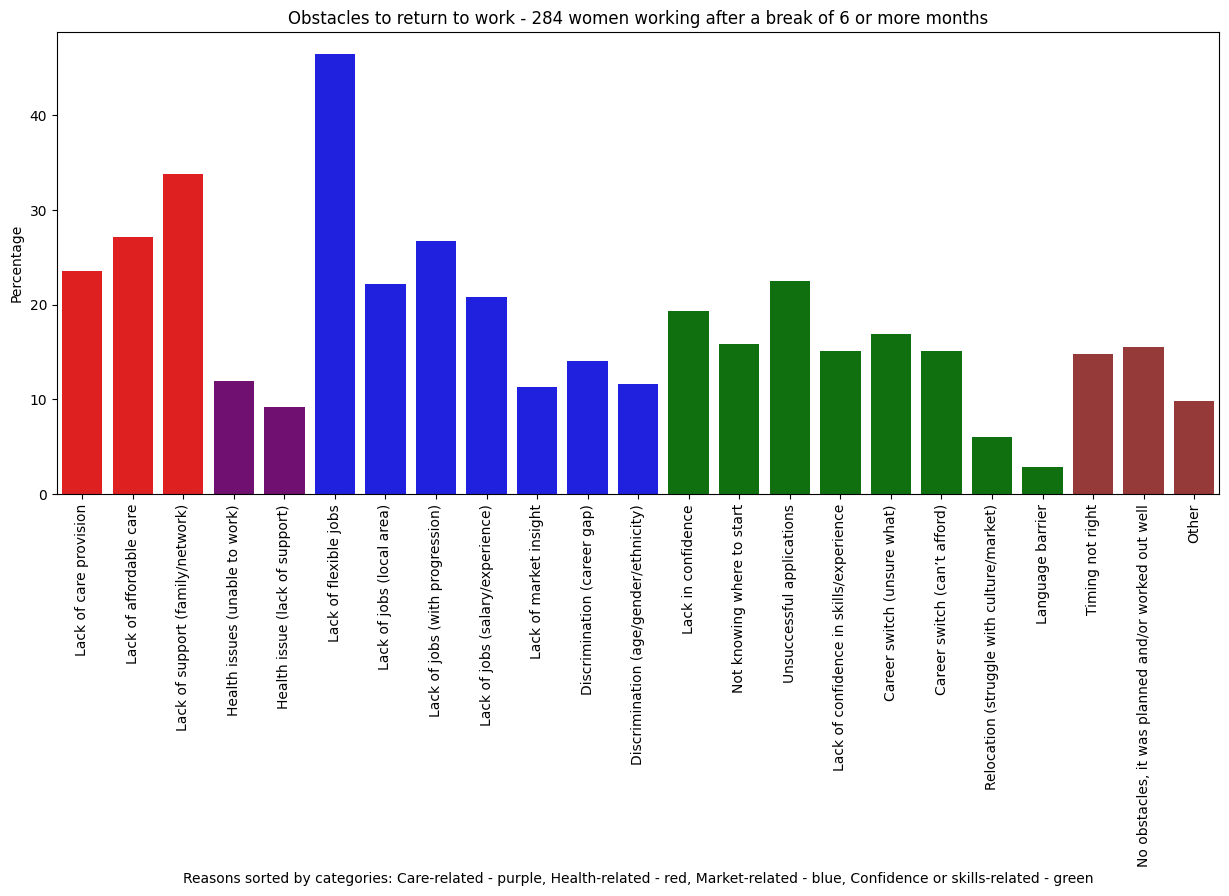

In [104]:
# WorkingBreakObstacles

#df = pd.read_csv("Career_Breaks_AK_1.2.3.csv")

#split and count values for column WorkingBreakObstacles
WorkingBreakObstacles_split = df['WorkingBreakObstacles'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
WorkingBreakObstacles_counts = WorkingBreakObstacles_split.value_counts().reset_index()
WorkingBreakObstacles_counts.columns = ['Value', 'Count']
#print(WorkingBreakObstacles_counts)

# Filter rows where count is greater than 1 into new DataFrame
WorkingBreakObstacles_count1 = WorkingBreakObstacles_counts[WorkingBreakObstacles_counts['Count'] > 1] 

# Sum the counts of rows where count = 1 and create a new row 'Other' 
other_countWObst = WorkingBreakObstacles_counts[WorkingBreakObstacles_counts['Count'] == 1]['Count'].sum() 
other_rowWObst = pd.DataFrame([{'Value': 'Other', 'Count': other_countWObst}]) 

# Append the 'Other' row to the filtered DataFrame 
WorkingBreakObstacles_clean = pd.concat([WorkingBreakObstacles_count1, other_rowWObst], ignore_index=True) 

#print(WorkingBreakObstacles_clean)

# use the total count in row 0 to create percentage
total_countWObst = WorkingBreakObstacles_clean['Count'].iloc[0]
percentageWObst = WorkingBreakObstacles_clean['Count']/total_countWObst*100

# add new column to df 
WorkingBreakObstacles_clean['Percentage'] = percentageWObst

print(WorkingBreakObstacles_clean)

#write to new csv file
WorkingBreakObstacles_clean.to_csv("WorkingBreakObstacles_clean.csv")

#plt.figure(figsize=(15,6))
#sns.barplot(data=WorkingBreakObstacles_clean[1:14], x='Value', y='Percentage', color='purple')
#plt.xticks(rotation=75)
#plt.show() 

plt.figure(figsize=(15,6))
sns.barplot(data=WorkingBreakObstacles_clean.loc[[5, 3, 2]], x='Value', y='Percentage', color='red')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[17, 20]], x='Value', y='Percentage', color='purple')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[1, 7, 4, 8, 19, 16, 18]], x='Value', y='Percentage', color='blue')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[9, 11, 6, 13, 10, 14, 21, 22]], x='Value', y='Percentage', color='green')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[15, 12, 23]], x='Value', y='Percentage', color='brown')
plt.xticks(rotation=90)
plt.title('Obstacles to return to work - 284 women working after a break of 6 or more months')
plt.xlabel('Reasons sorted by categories: Care-related - purple, Health-related - red, Market-related - blue, Confidence or skills-related - green')
plt.show() 


### **What has changed after a previous career break**

                                                Value  Count  Percentage
3       I am now working below my former career level     99   34.859155
2          I am now working below my potential/skills    104   36.619718
1                                   I am earning less    127   44.718310
4   I am now working fewer hours than before/ I wo...     97   34.154930
8     I am less confident in my skills/ the work I do     72   25.352113
9      My career progressed/ developed after my break     49   17.253521
11                                  I am earning more     44   15.492958
13                I am working more hours than before     27    9.507042
10     I am more confident in my skills/the work I do     45   15.845070
7                                    I changed career     89   31.338028
12                             I am now self-employed     29   10.211268
14  Nothing has changed, I picked up after my brea...     26    9.154930
6                     My stress levels have increas

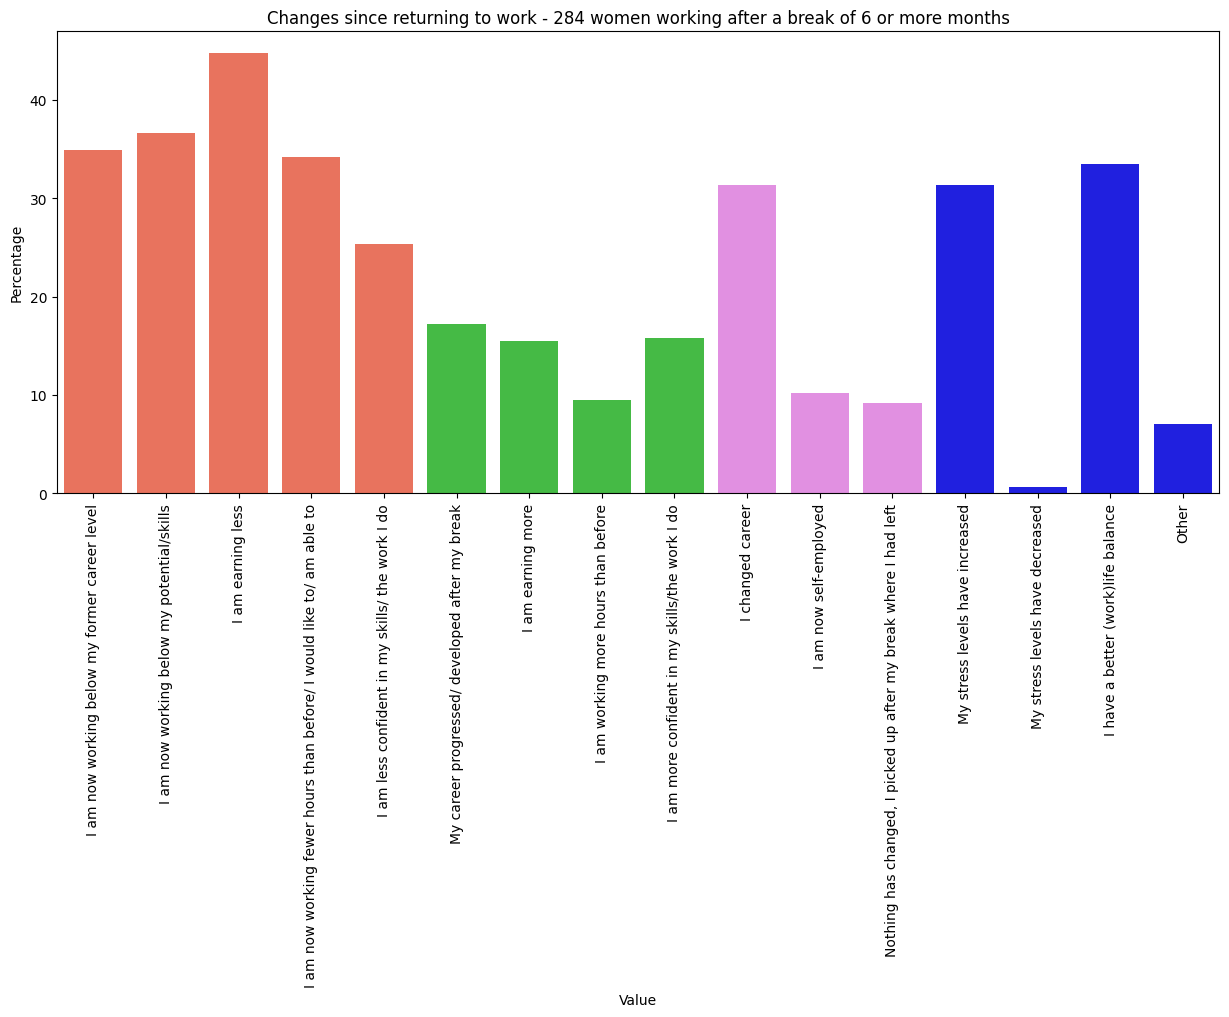

In [105]:
# Count out WorkingChanges - then arrange by categories incl. working below former level, working below skills/experince
# earning less etc. 

#split and count values for column WorkingChanges
WorkingChanges_split = df['WorkingChanges'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
WorkingChanges_counts = WorkingChanges_split.value_counts().reset_index()
WorkingChanges_counts.columns = ['Value', 'Count']
#print(WorkingChanges_counts)

# Filter rows where count is greater than 1 into new DataFrame
WorkingChanges_count1 = WorkingChanges_counts[WorkingChanges_counts['Count'] > 1] 

# Sum the counts of rows where count = 1 and create a new row 'Other' 
other_countCh = WorkingChanges_counts[WorkingChanges_counts['Count'] == 1]['Count'].sum() 
other_rowCh= pd.DataFrame([{'Value': 'Other', 'Count': other_countCh}]) 

# Append the 'Other' row to the filtered DataFrame 
WorkingChanges_clean = pd.concat([WorkingChanges_count1, other_rowCh], ignore_index=True) 

#print(WorkingChanges_clean)

# use the total count in row 0 to create percentage
total_countCh = WorkingChanges_clean['Count'].iloc[0]
percentageCh = WorkingChanges_clean['Count']/total_countCh*100

# add new column to df 
WorkingChanges_clean['Percentage'] = percentageCh

#print(WorkingChanges_clean)
print(WorkingChanges_clean.loc[[3, 2, 1, 4, 8, 9, 11, 13, 10, 7, 12, 14, 6, 15, 5, 16]])

#write to new csv file
WorkingChanges_clean.to_csv("WorkingChanges_clean.csv")

plt.figure(figsize=(15,6))
sns.barplot(data=WorkingChanges_clean.loc[[3, 2, 1, 4, 8]], x='Value', y='Percentage', color='tomato')
sns.barplot(data=WorkingChanges_clean.loc[[9, 11, 13, 10]], x='Value', y='Percentage', color='limegreen')
sns.barplot(data=WorkingChanges_clean.loc[[7, 12, 14]], x='Value', y='Percentage', color='violet')
sns.barplot(data=WorkingChanges_clean.loc[[6, 15, 5, 16]], x='Value', y='Percentage', color='blue')
plt.xticks(rotation=90)
plt.title('Changes since returning to work - 284 women working after a break of 6 or more months')
#plt.xlabel('Reasons sorted by categories: Care-related - purple, Health-related - red, Market-related - blue, Confidence or skills-related - green')
plt.show() 

### **Characteristics applying to all women participating in survey**

In [106]:
#split and count for AllCharacteristics

AllCharacteristics_split = df['AllCharacteristics'].str.split(';',expand=True).stack().reset_index(level=1, drop=True).str.strip().reset_index(drop=True)
AllCharacteristics_counts = AllCharacteristics_split.value_counts().reset_index()
AllCharacteristics_counts.columns = ['Value', 'Count']
#print(AllCharacteristics_counts)
                                                                                                     

In [107]:
#unique value are counted and summed up into "other"
AllCharacteristics_count1 = AllCharacteristics_counts[AllCharacteristics_counts['Count'] > 1] 

otherCha_count = AllCharacteristics_counts[AllCharacteristics_counts['Count'] == 1]['Count'].sum() 
otherCha_row = pd.DataFrame([{'Value': 'Other', 'Count': otherCha_count}]) 

AllCharacteristics_clean = pd.concat([AllCharacteristics_count1, otherCha_row], ignore_index=True) 

#print(AllCharacteristics_clean)

                                                Value  Count  Percentage
0                                                        470  100.000000
1                                          Motherhood    378   80.425532
2                        Perimenopausal or Menopausal    147   31.276596
3                                Mental health issues    110   23.404255
4                                Experience of trauma     70   14.893617
5   Caring for a child with additional support nee...     69   14.680851
6                Disabled or chronic health condition     62   13.191489
7   Unfamiliarity with Scottish labour market (new...     57   12.127660
8               ADHD, autism or other neurodivergence     55   11.702128
9                                         Lone parent     51   10.851064
10                       Caring for an adult relative     40    8.510638
11                                  Older woman (55+)     36    7.659574
12                              Minority ethnic wom

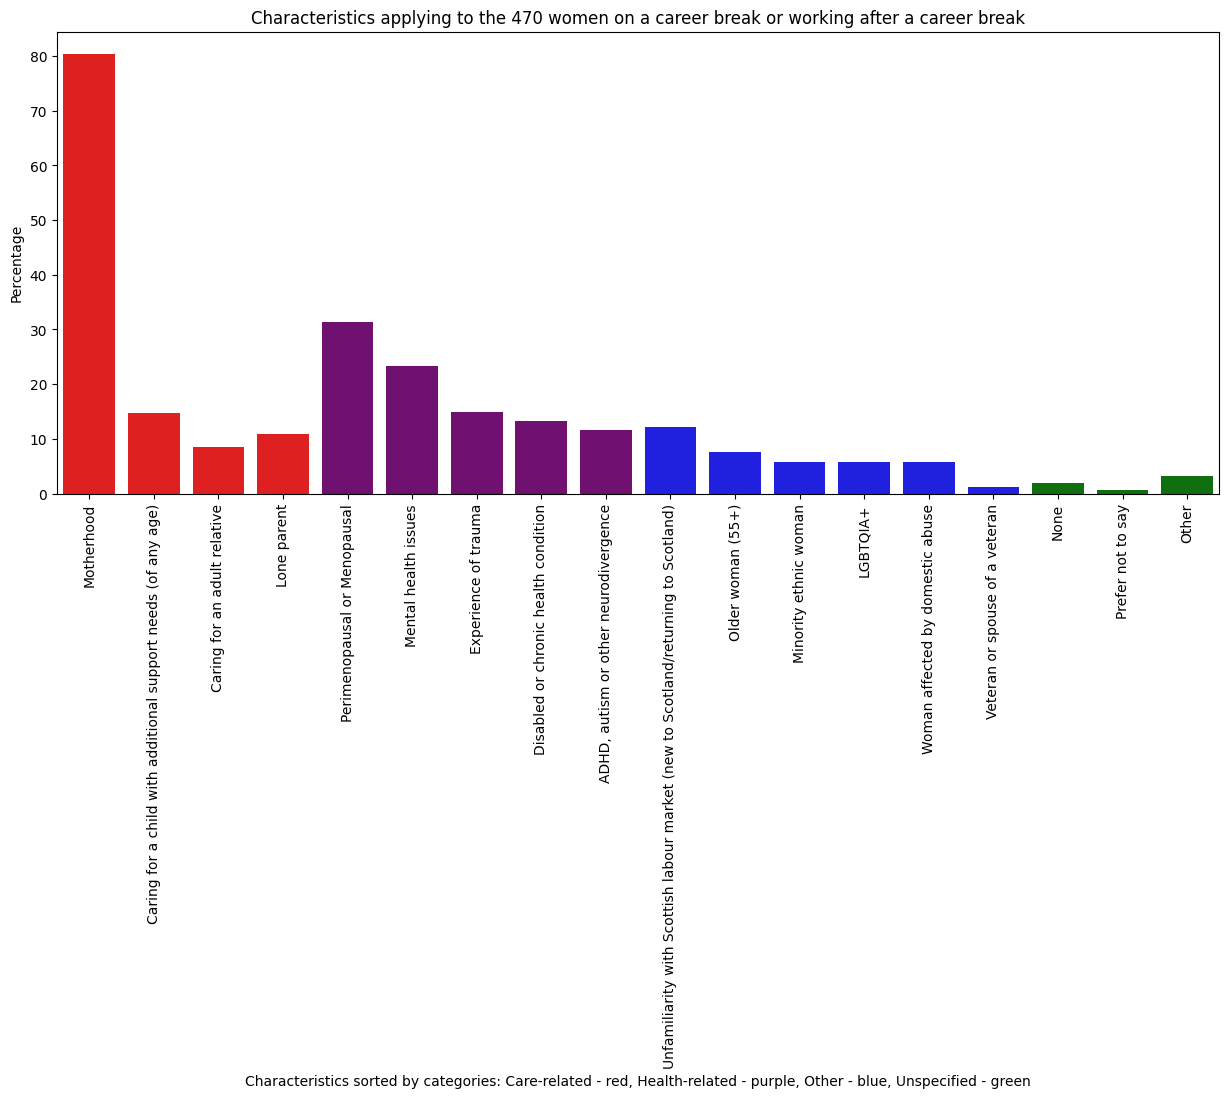

In [108]:
#Calculate percentages and add column
total_countAllCha = AllCharacteristics_clean['Count'].iloc[0]
percentageAllCha = AllCharacteristics_clean['Count']/total_countAllCha*100
AllCharacteristics_clean['Percentage'] = percentageAllCha

#print out new data frame
print(AllCharacteristics_clean)

#write table to new csv file
AllCharacteristics_clean.to_csv("AllCharacteristics_clean.csv")

#plot Characteristics, ordered by caring responsibility, health, work related, private
plt.figure(figsize=(15,6))
sns.barplot(data=AllCharacteristics_clean.loc[[1, 5, 10, 9]], x='Value', y='Percentage', color='red')
sns.barplot(data=AllCharacteristics_clean.loc[[2, 3, 4, 6, 8]], x='Value', y='Percentage', color='purple')
sns.barplot(data=AllCharacteristics_clean.loc[[7, 11, 12, 13, 14, 16]], x='Value', y='Percentage', color='blue')
sns.barplot(data=AllCharacteristics_clean.loc[[15, 17, 18]], x='Value', y='Percentage', color='green')
plt.xticks(rotation=90)
plt.title('Characteristics applying to the 470 women on a career break or working after a career break')
plt.xlabel('Characteristics sorted by categories: Care-related - red, Health-related - purple, Other - blue, Unspecified - green')
plt.show() 

### **Length of career break - split into those currently on a break and those working after a previous break**

CurrentBreakLength
6 months to 2 years    44.623656
2 to 5 years           28.494624
more than 5 years      26.881720
Name: count, dtype: float64


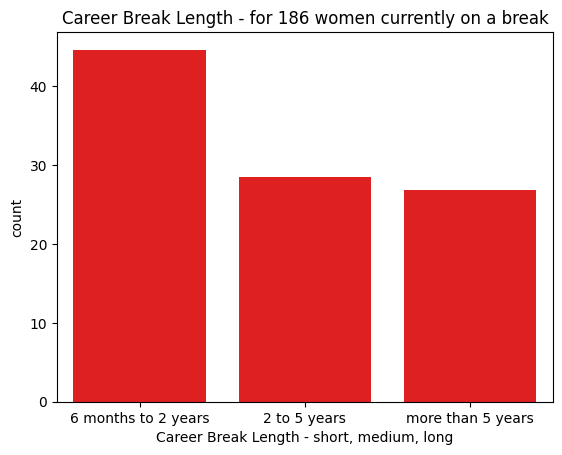

WorkingBreakLength
6 months to 2 years    69.366197
more than 5 years      15.845070
2 to 5 years           14.788732
Name: count, dtype: float64


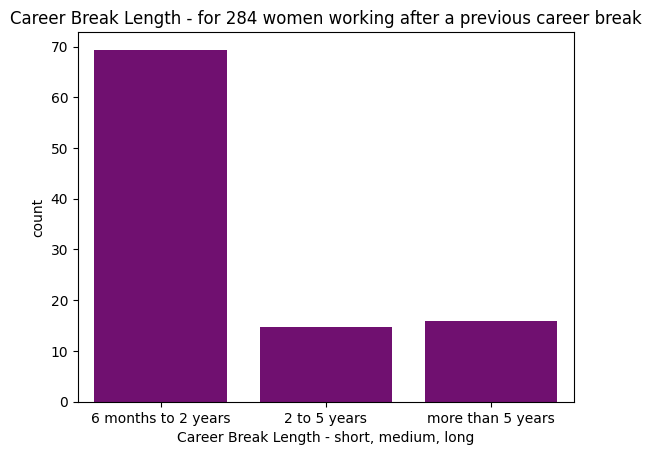

In [109]:
# CurrentBreakLength and WorkingBreakLength - plot both graphs, ideally into one 

CurrentBreakLength = df['CurrentBreakLength']
CurrentBreakLength_count = CurrentBreakLength.value_counts()
CurrentBreakLength_perc = CurrentBreakLength_count/186*100
print(CurrentBreakLength_perc)
sns.barplot(data=CurrentBreakLength_perc, color='red')
plt.title('Career Break Length - for 186 women currently on a break')
plt.xlabel('Career Break Length - short, medium, long')
plt.show()

WorkingBreakLength = df['WorkingBreakLength']
WorkingBreakLength_count = WorkingBreakLength.value_counts()
WorkingBreakLength_perc = WorkingBreakLength_count/284*100
print(WorkingBreakLength_perc)
sns.barplot(data=WorkingBreakLength_perc.iloc[[0, 2, 1]], color='purple')
plt.title('Career Break Length - for 284 women working after a previous career break')
plt.xlabel('Career Break Length - short, medium, long')
plt.show()

#write table to new csv file
CurrentBreakLength_perc.to_csv("CurrentBreakLength_perc.csv")
WorkingBreakLength_perc.to_csv("WorkingBreakLength_perc.csv")


### **Suppert offers that would be helpful to return to work after a break**

Three options relevant for this survey
- Affordable Childcare provision
- Flexible working arrangements in organisations
- Return-to-work support through Employer

Table for Support through Affordable Childcare Provision
              Value  Count  Percentage
0      very helpful    271   64.988010
2      nice to have     69   16.546763
1  no need for this     72   17.266187
3          not sure      5    1.199041



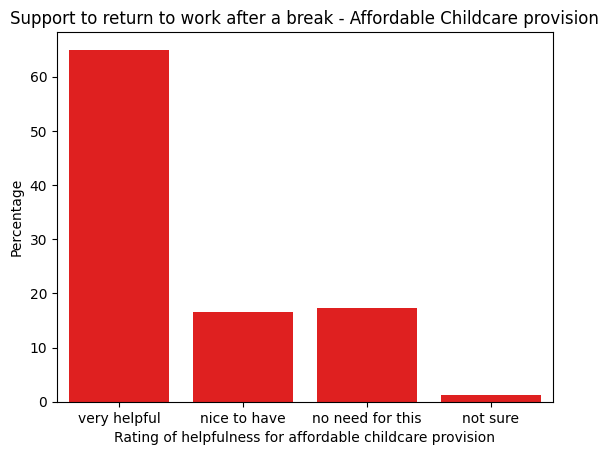

In [110]:
#create three tables for the support that would be helpful acc to respondents
#SupportAffordableChildcare, SupportFlexWorkEmployers, SupportThroughEmployer

df_SuppAffChi = df['SupportAffordableChildcare'].value_counts().reset_index()
df_SuppAffChi.columns = ['Value', 'Count']

total_count_SuppAffChi = df_SuppAffChi['Count'].sum()
perc_SuppAffChi = df_SuppAffChi['Count']/total_count_SuppAffChi*100
df_SuppAffChi['Percentage'] = perc_SuppAffChi

print('Table for Support through Affordable Childcare Provision')
print(df_SuppAffChi.loc[[0, 2, 1, 3]])
print()

#write into csv file
df_SuppAffChi.to_csv("df_SuppAffChi.csv")

sns.barplot(data=df_SuppAffChi.iloc[[0, 2, 1, 3]], x='Value', y='Percentage', color='red')
plt.title('Support to return to work after a break - Affordable Childcare provision')
plt.xlabel('Rating of helpfulness for affordable childcare provision')
plt.show()


Table for support through Flexible working arrangements in organisations
              Value  Count  Percentage
0      very helpful    402   86.825054
1      nice to have     41    8.855292
2  no need for this     16    3.455724
3          not sure      4    0.863931



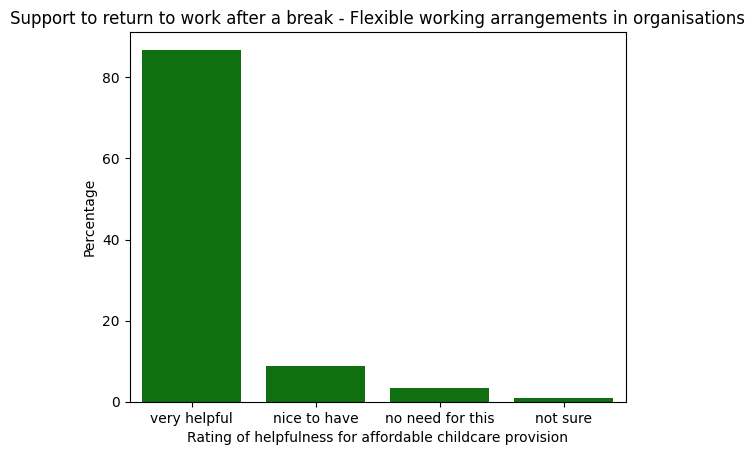

In [111]:
df_SuppFlex = df['SupportFlexWorkEmployers'].value_counts().reset_index()
df_SuppFlex.columns = ['Value', 'Count']

total_count_SuppFlex = df_SuppFlex['Count'].sum()
perc_SuppFlex = df_SuppFlex['Count']/total_count_SuppFlex*100
df_SuppFlex['Percentage'] = perc_SuppFlex

print('Table for support through Flexible working arrangements in organisations')
print(df_SuppFlex)
print()

sns.barplot(data=df_SuppFlex, x='Value', y='Percentage', color='green')
plt.title('Support to return to work after a break - Flexible working arrangements in organisations')
plt.xlabel('Rating of helpfulness for affordable childcare provision')
plt.show()

#write into csv file
df_SuppFlex.to_csv("df_SuppFlex.csv")


Table for support through Return-to-work support through Employer
              Value  Count  Percentage
0      very helpful    251   56.278027
1      nice to have    135   30.269058
2  no need for this     47   10.538117
3          not sure     13    2.914798


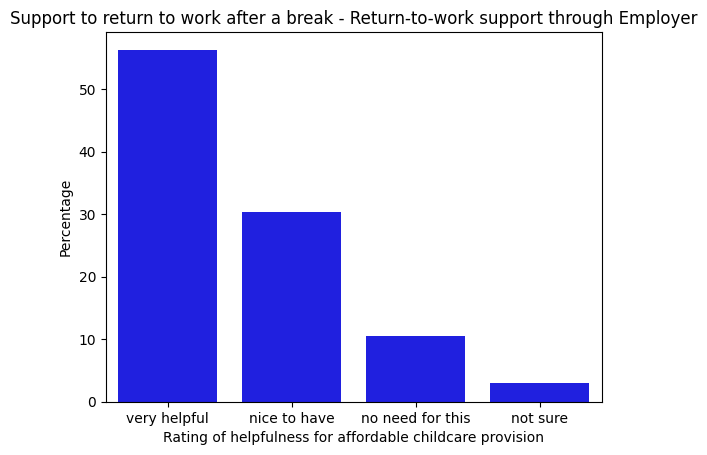

In [112]:
df_SuppEmpl = df['SupportThroughEmployer'].value_counts().reset_index()
df_SuppEmpl.columns = ['Value', 'Count']

total_count_SuppEmpl = df_SuppEmpl['Count'].sum()
perc_SuppEmpl = df_SuppEmpl['Count']/total_count_SuppEmpl*100
df_SuppEmpl['Percentage'] = perc_SuppEmpl

print('Table for support through Return-to-work support through Employer')
print(df_SuppEmpl)

sns.barplot(data=df_SuppEmpl, x='Value', y='Percentage', color='blue')
plt.title('Support to return to work after a break - Return-to-work support through Employer')
plt.xlabel('Rating of helpfulness for affordable childcare provision')
plt.show()

#write into csv file
df_SuppEmpl.to_csv("df_SuppEmpl.csv")


### Demographic information

### Children living in household

                Value  Count  Percentage
2            No child     91   19.361702
1             1 child    135   28.723404
0          2 children    188   40.000000
3          3 children     42    8.936170
4  4 or more children     11    2.340426
5   Prefer not to say      3    0.638298


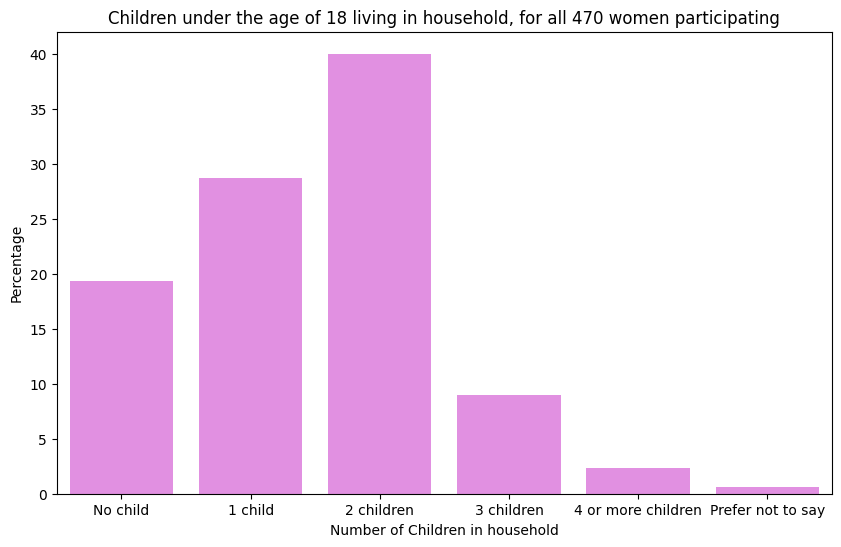

In [113]:
df_AllChildrenInHousehold = df['AllChildrenInHousehold'].value_counts().reset_index()
df_AllChildrenInHousehold.columns = ['Value', 'Count']
#print(df_AllChildrenInHousehold)

total_count_AllChildrenInHousehold = df_AllChildrenInHousehold['Count'].sum()
perc_AllChildrenInHousehold = df_AllChildrenInHousehold['Count']/total_count_AllChildrenInHousehold*100
df_AllChildrenInHousehold['Percentage'] = perc_AllChildrenInHousehold

print(df_AllChildrenInHousehold.loc[[2, 1, 0, 3, 4, 5]])

#write into csv file
df_AllChildrenInHousehold.to_csv("df_AllChildrenInHousehold.csv")

plt.figure(figsize=(10,6))
sns.barplot(data=df_AllChildrenInHousehold.iloc[[2, 1, 0, 3, 4, 5]], x='Value', y='Percentage', color='violet')
plt.title('Children under the age of 18 living in household, for all 470 women participating')
plt.xlabel('Number of Children in household')
plt.show()

### Do any of your child/ren have additional support needs? 

               Value  Count  Percentage
0                 No    293   77.925532
1                Yes     76   20.212766
2  Prefer not to say      7    1.861702


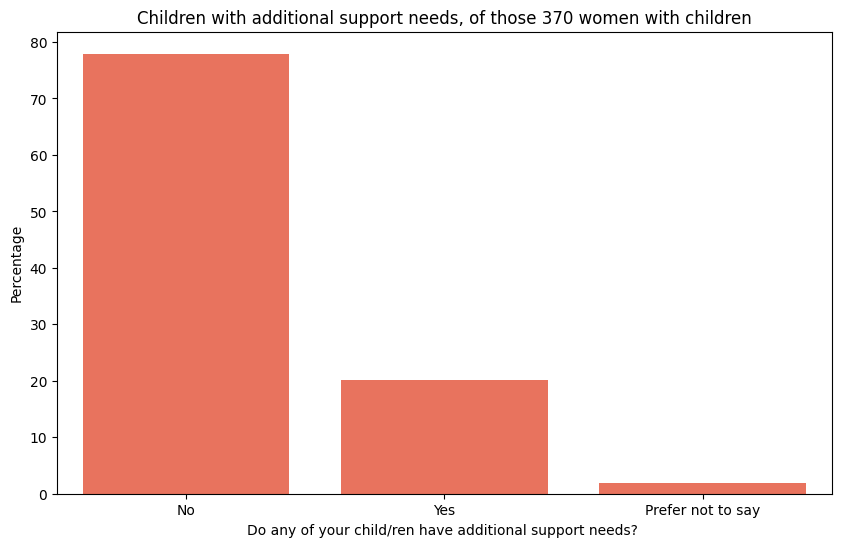

In [114]:
#AllChildrenInHousehold, AllChildrenWithASN
#AllAge and AllEducation

df_AllChildrenWithASN = df['AllChildrenWithASN'].value_counts().reset_index()
df_AllChildrenWithASN.columns = ['Value', 'Count']
#print(df_AllChildrenWithASN)

total_count_AllChildrenWithASN = df_AllChildrenWithASN['Count'].sum()
perc_AllChildrenWithASN = df_AllChildrenWithASN['Count']/total_count_AllChildrenWithASN*100
df_AllChildrenWithASN['Percentage'] = perc_AllChildrenWithASN

print(df_AllChildrenWithASN)

#write into csv file
df_AllChildrenWithASN.to_csv("df_AllChildrenWithASN.csv")

plt.figure(figsize=(10,6))
sns.barplot(data=df_AllChildrenWithASN, x='Value', y='Percentage', color='tomato')
plt.title('Children with additional support needs, of those 370 women with children')
plt.xlabel('Do any of your child/ren have additional support needs? ')
plt.show()

               Value  Count  Percentage
5     under 22 years      3    0.638298
3     22 to 29 years     18    3.829787
1     30 to 39 years    168   35.744681
0     40 to 49 years    190   40.425532
2     50 to 59 years     77   16.382979
4                60+     13    2.765957
6  Prefer not to say      1    0.212766


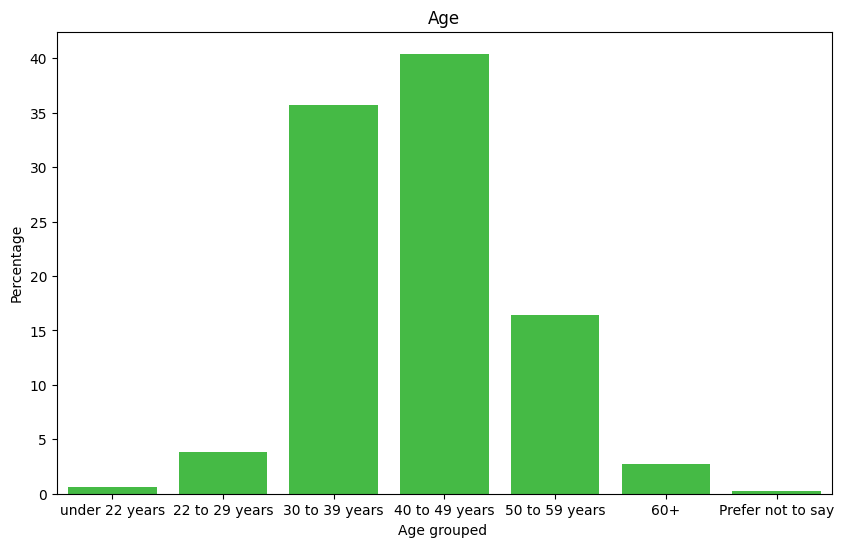

In [115]:
#AllAge and AllEducation

df_AllAge = df['AllAge'].value_counts().reset_index()
df_AllAge.columns = ['Value', 'Count']
#print(df_AllAge)

total_count_AllAge = df_AllAge['Count'].sum()
perc_AllAge = df_AllAge['Count']/total_count_AllAge*100
df_AllAge['Percentage'] = perc_AllAge

print(df_AllAge.loc[[5, 3, 1, 0, 2, 4, 6]])

#write into csv file
df_AllAge.to_csv("df_AllAge.csv")

plt.figure(figsize=(10,6))
sns.barplot(data=df_AllAge.iloc[[5, 3, 1, 0, 2, 4, 6]], x='Value', y='Percentage', color='limegreen')
plt.title('Age')
plt.xlabel('Age grouped ')
plt.show()

                                               Value  Count  Percentage
3                   Secondary/high school education      33    7.021277
2  Post-secondary/high school education, incl. co...     79   16.808511
0                    Bachelor's degree or equivalent    169   35.957447
1                     Master's dregree or equivalent    168   35.744681
4                       Doctoral (PhD) or equivalent     20    4.255319
5                                  Prefer not to say      1    0.212766


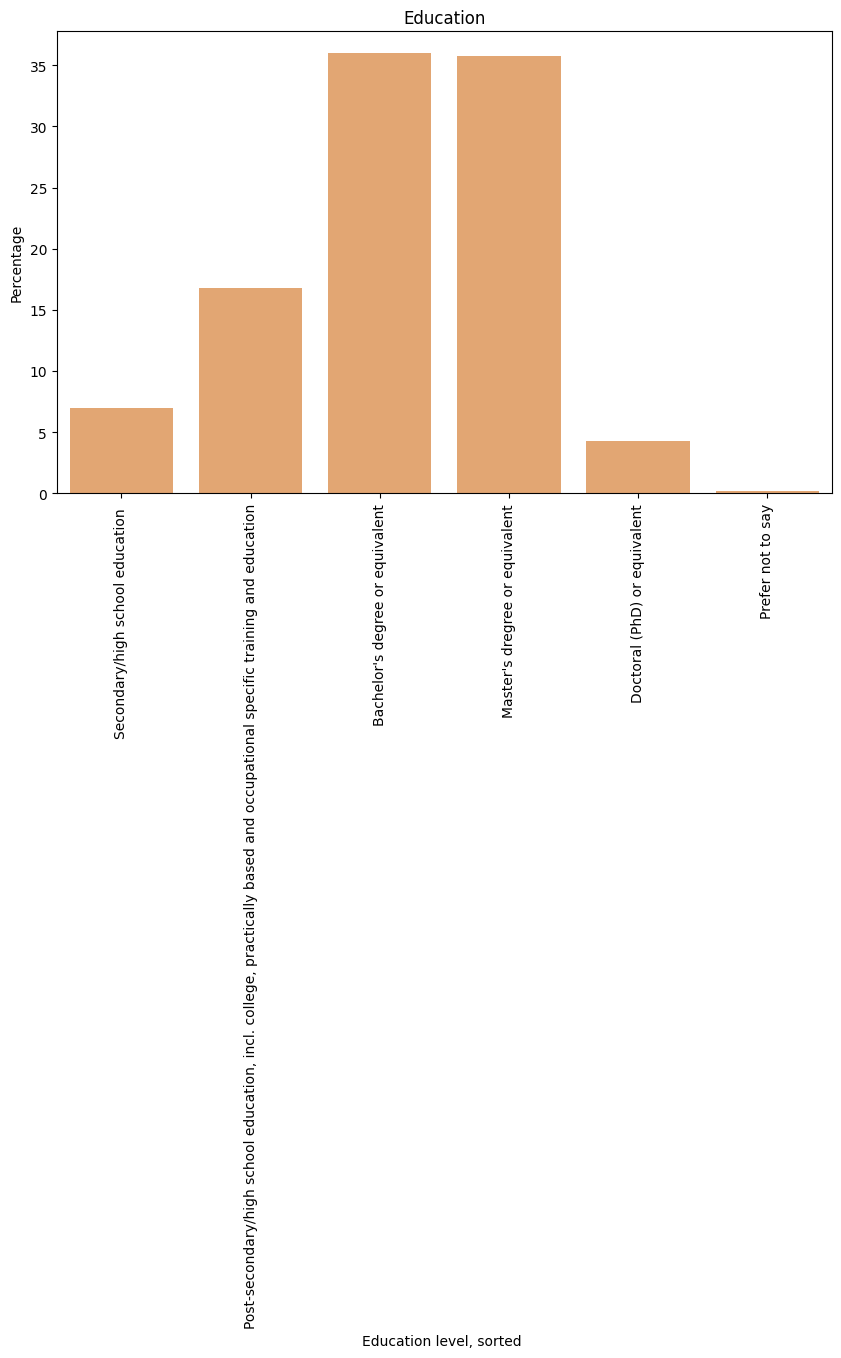

In [116]:
#AllEducation

df_AllEducation = df['AllEducation'].value_counts().reset_index()
df_AllEducation.columns = ['Value', 'Count']
#print(df_AllEducation)

total_count_AllEducation = df_AllEducation['Count'].sum()
perc_AllEducation = df_AllEducation['Count']/total_count_AllEducation*100
df_AllEducation['Percentage'] = perc_AllEducation

print(df_AllEducation.loc[[3, 2, 0, 1, 4, 5]])

#write into csv file
df_AllEducation.to_csv("df_AllEducation.csv")

plt.figure(figsize=(10,6))
sns.barplot(data=df_AllEducation.iloc[[3, 2, 0, 1, 4, 5]], x='Value', y='Percentage', color='sandybrown')
plt.xticks(rotation=90)
plt.title('Education')
plt.xlabel('Education level, sorted ')
plt.show()

CurrentBreakLength
6 months to 2 years    44.623656
2 to 5 years           28.494624
more than 5 years      26.881720
Name: count, dtype: float64


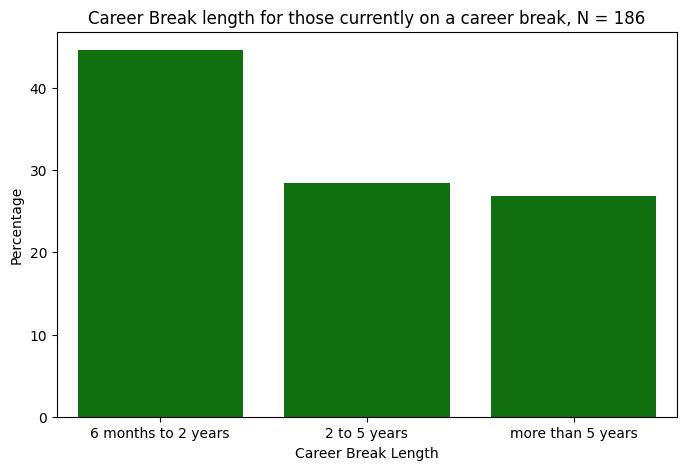

ValueError: Cannot mask with non-boolean array containing NA / NaN values

In [117]:
# compare difference of career break length
# for those currently on a career break
# that state Childcare, or Other Caring Responsibility, or Maternity Leave as a reason for their breaks
# and compare with all currently on a break

# Career Break length for those currently on a career break, N = 186
CurrentBreakLength = df['CurrentBreakLength']
CurrentBreakLength_count = CurrentBreakLength.value_counts()
CurrentBreakLength_perc = CurrentBreakLength_count/186*100
print(CurrentBreakLength_perc)
plt.figure(figsize=(8, 5))
sns.barplot(data=CurrentBreakLength_perc, color='green')
plt.title('Career Break length for those currently on a career break, N = 186')
plt.xlabel('Career Break Length')
plt.ylabel('Percentage')
plt.show()

df_Childcare = df[df['CurrentBreakReason'].str.contains('Childcare')]
df_OtherCaring = df[df['CurrentBreakReason'].str.contains('Other Caring Responsibilities')]
df_MatLeave = df[df['CurrentBreakReason'].str.contains('Maternity leave')]

Childcare_BreakLength = df_Childcare['CurrentBreakLength']
Childcare_BreakLength_count = Childcare_BreakLength.value_counts()
Childcare_BreakLength_sum = Childcare_BreakLength.value_counts().sum()
Childcare_BreakLength_perc = Childcare_BreakLength_count/Childcare_BreakLength_sum*100
print(Childcare_BreakLength_perc)
plt.figure(figsize=(8, 5))
sns.barplot(data=Childcare_BreakLength_perc.iloc[[2, 0, 1]], color='red')
plt.title(f'Career Break Length - for {Childcare_BreakLength_sum} women stating Childcare as a reason for the career break they are currently on')
plt.xlabel('Career Break Length')
plt.ylabel('Percentage')
plt.show()

OtherCaring_BreakLength = df_OtherCaring['CurrentBreakLength']
OtherCaring_BreakLength_count = OtherCaring_BreakLength.value_counts()
OtherCaring_BreakLength_sum = OtherCaring_BreakLength.value_counts().sum()
OtherCaring_BreakLength_perc = OtherCaring_BreakLength_count/OtherCaring_BreakLength_sum*100
print(OtherCaring_BreakLength_perc)
plt.figure(figsize=(8, 5))
sns.barplot(data=OtherCaring_BreakLength_perc.iloc[[1, 2, 0]], color='tomato')
plt.title(f'Career Break Length - for {OtherCaring_BreakLength_sum} women stating Other Caring Responsibilities as a reason for the career break they are currently on')
plt.xlabel('Career Break Length')
plt.ylabel('Percentage')
plt.show()

MatLeave_BreakLength = df_MatLeave['CurrentBreakLength']
MatLeave_BreakLength_count = MatLeave_BreakLength.value_counts()
MatLeave_BreakLength_sum = MatLeave_BreakLength.value_counts().sum()
MatLeave_BreakLength_perc = MatLeave_BreakLength_count/MatLeave_BreakLength_sum*100
print(MatLeave_BreakLength_perc)
plt.figure(figsize=(8, 5))
sns.barplot(data=MatLeave_BreakLength_perc, color='violet')
plt.title(f'Career Break Length - for {MatLeave_BreakLength_sum} women stating Maternity Leave as a reason for the career break they are currently on')
plt.xlabel('Career Break Length')
plt.ylabel('Percentage')
plt.show()


In [ ]:
#check correlation between caring responsibility and length of career breaks
#AllCharacteristics - Motherhood, Caring for Child with ASN, Caring for adult
#AllBreakActivity - Stay-at-home parent, Unpaid caring responsibility
#Obstacles - lack of care provision, lack of affordable care (for both those on a break and working after)


#check correlation between number of obstacles and length of career break
#check correlation between number of reasons and length of career break
#check correlation between number of characteristics and length of career break

How to display relations: 

Extract in column Reason (separately for CurrentBreak and Working) those having said 
Maternity Leave, Childcare, Other Caring Responsibilities 
then check whether their break is short, medium or long. 

along the x-axis categories/Reasons (Mat Leave/Childcare/Other Caring Respons), 
along the y-axis mark length of break (short/medium/long), 
and the count of those who fall in each combination marks the size of a circle (third dimension). 
Use percentages for the counts. 



Graph to show reasons for career breaks: 
One or two graphs - merge "on break" and "working" or do both in one graph with different colours? 
line up number of reasons for career breaks on x-axis from 1 to ? potentially count up to certain number then gather rest in "more than certain number". 
then count out how many gave which number of reasons on y-axis. 
What does that help? 
Can I mark those with caring responsibility in a different colour? shading the colour depending on how many of those? 
Can I mark those with health issues (mental health, disability, neurodivergence, menopause) in a different colour, shading by the number of additional issues? 
The graph may be made of circles - ...?

Graph for career break reasons
Venn diagram 
- one cirle for those saying "childcare responsibility" 97 + 103
- one circle for those saying "currently on mat leave" 62 + 144
- one circle for other caring responsibilities 42 + 28
- check overlap of the three - those who have all three, how long have they been out of work?

two diagrams - On Break and Working

Why did women take a career break - split by on a break and working (interestingly there is a difference, which can be due to bias - when back to work, judging things differently? Or those who are back to work have managed the obstacles?)
Show the different main points - caring resposibility (childcare, mat leave, caring for others), health related issues (health, disability, menopause, ADHD), workplace related (redundancy, burn-out, bullying)
- either use the responses from Break Reason (split by on break/working as per 2 diff branches)
- or use responses from Characteristics (split by on break/working - from question current situation)
- 

In [ ]:
#compare the two plots for obstacles to return to work for those still on a break and those working
#play with colours for columns
#can't display both into one graph - very frustrating!

plt.figure(figsize=(15,6))
sns.barplot(data=CurrentBreakObstacles_clean.loc[[7, 11, 3]], x='Value', y='Percentage', color='red')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[15, 13]], x='Value', y='Percentage', color='purple')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[1, 10, 14, 16, 17, 9, 19]], x='Value', y='Percentage', color='navy')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[2, 4, 5, 8, 6, 18, 20, 22]], x='Value', y='Percentage', color='green')
sns.barplot(data=CurrentBreakObstacles_clean.loc[[12, 21, 23]], x='Value', y='Percentage', color='brown')
plt.xticks(rotation=90)
plt.title('Obstacles to return to work - 186 women currently on a break of 6 or more months')
plt.xlabel('Reasons sorted by categories: Care-related - red, Health-related - purple, Market-related - blue, Confidence or skills-related - green')
plt.show() 

plt.figure(figsize=(15,6))
sns.barplot(data=WorkingBreakObstacles_clean.loc[[5, 3, 2]], x='Value', y='Percentage', color='tomato')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[17, 20]], x='Value', y='Percentage', color='violet')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[1, 7, 4, 8, 19, 16, 18]], x='Value', y='Percentage', color='blue')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[9, 11, 6, 13, 10, 14, 21, 22]], x='Value', y='Percentage', color='limegreen')
sns.barplot(data=WorkingBreakObstacles_clean.loc[[15, 12, 23]], x='Value', y='Percentage', color='sandybrown')
plt.xticks(rotation=90)
plt.title('Obstacles to return to work - 284 women working after a break of 6 or more months')
plt.xlabel('Reasons sorted by categories: Care-related - red, Health-related - purple, Market-related - blue, Confidence or skills-related - green')
plt.show()